# Prediksi `Salary: Annual compensation in USD`

Link dataset: https://www.kaggle.com/datasets/gmudit/employer-data/data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

## 1. Overview Dataset

In [2]:
df = pd.read_csv("../../data/Employers_data.csv")
df.shape

(10000, 10)

In [3]:
df.sample(10)

,Employee_ID,Name,Age,Gender,Department,Job_Title,Experience_Years,Education_Level,Location,Salary
3884,3885,Ermelinda Hayes,29,Female,Marketing,Analyst,8,Bachelor,Seattle,75000
6318,6319,Rebecca Carlisle,26,Female,HR,Analyst,5,Bachelor,Chicago,70000
6488,6489,Heriberto Brandwein,48,Male,HR,Manager,25,Master,San Francisco,150000
9015,9016,Brock Bean,39,Male,Finance,Executive,16,Master,San Francisco,170000
5267,5268,Mark Solomon,44,Male,Product,Manager,21,Master,Seattle,145000
4753,4754,Roberto Michel,22,Male,HR,Analyst,1,Bachelor,San Francisco,60000
6721,6722,Maria Hill,31,Female,Product,Manager,8,Master,Chicago,110000
1344,1345,Jennifer Powell,23,Female,Engineering,Intern,0,Bachelor,New York,35000
6828,6829,Jean Johnson,23,Male,Finance,Analyst,2,Bachelor,Seattle,70000
383,384,Ernesto Mcmillian,42,Male,Engineering,Manager,19,Master,New York,130000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Employee_ID       10000 non-null  int64 
 1   Name              10000 non-null  object
 2   Age               10000 non-null  int64 
 3   Gender            10000 non-null  object
 4   Department        10000 non-null  object
 5   Job_Title         10000 non-null  object
 6   Experience_Years  10000 non-null  int64 
 7   Education_Level   10000 non-null  object
 8   Location          10000 non-null  object
 9   Salary            10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [5]:
df.describe()

,Employee_ID,Age,Experience_Years,Salary
count,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,35.455900,12.370900,115381.500000
std,2886.89568,10.000213,9.148951,46066.139047
min,1.00000,21.000000,0.000000,25000.000000
25%,2500.75000,27.000000,5.000000,70000.000000
50%,5000.50000,34.000000,10.000000,120000.000000
75%,7500.25000,43.000000,19.000000,150000.000000
max,10000.00000,60.000000,37.000000,215000.000000


## 2. Data Cleaning

In [6]:
df.isna().sum() / len(df) * 100

Employee_ID         0.0
Name                0.0
Age                 0.0
Gender              0.0
Department          0.0
Job_Title           0.0
Experience_Years    0.0
Education_Level     0.0
Location            0.0
Salary              0.0
dtype: float64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df = df.drop("Name", axis=1)

In [9]:
df.head()

,Employee_ID,Age,Gender,Department,Job_Title,Experience_Years,Education_Level,Location,Salary
0,1,24,Female,Engineering,Engineer,1,Master,Austin,90000
1,2,56,Male,Sales,Executive,33,Master,Seattle,195000
2,3,21,Male,Engineering,Intern,1,Bachelor,New York,35000
3,4,30,Male,Finance,Analyst,9,Bachelor,New York,75000
4,5,25,Female,HR,Analyst,2,Master,Seattle,70000


Text(0.5, 1.0, 'Distribusi Education Level')

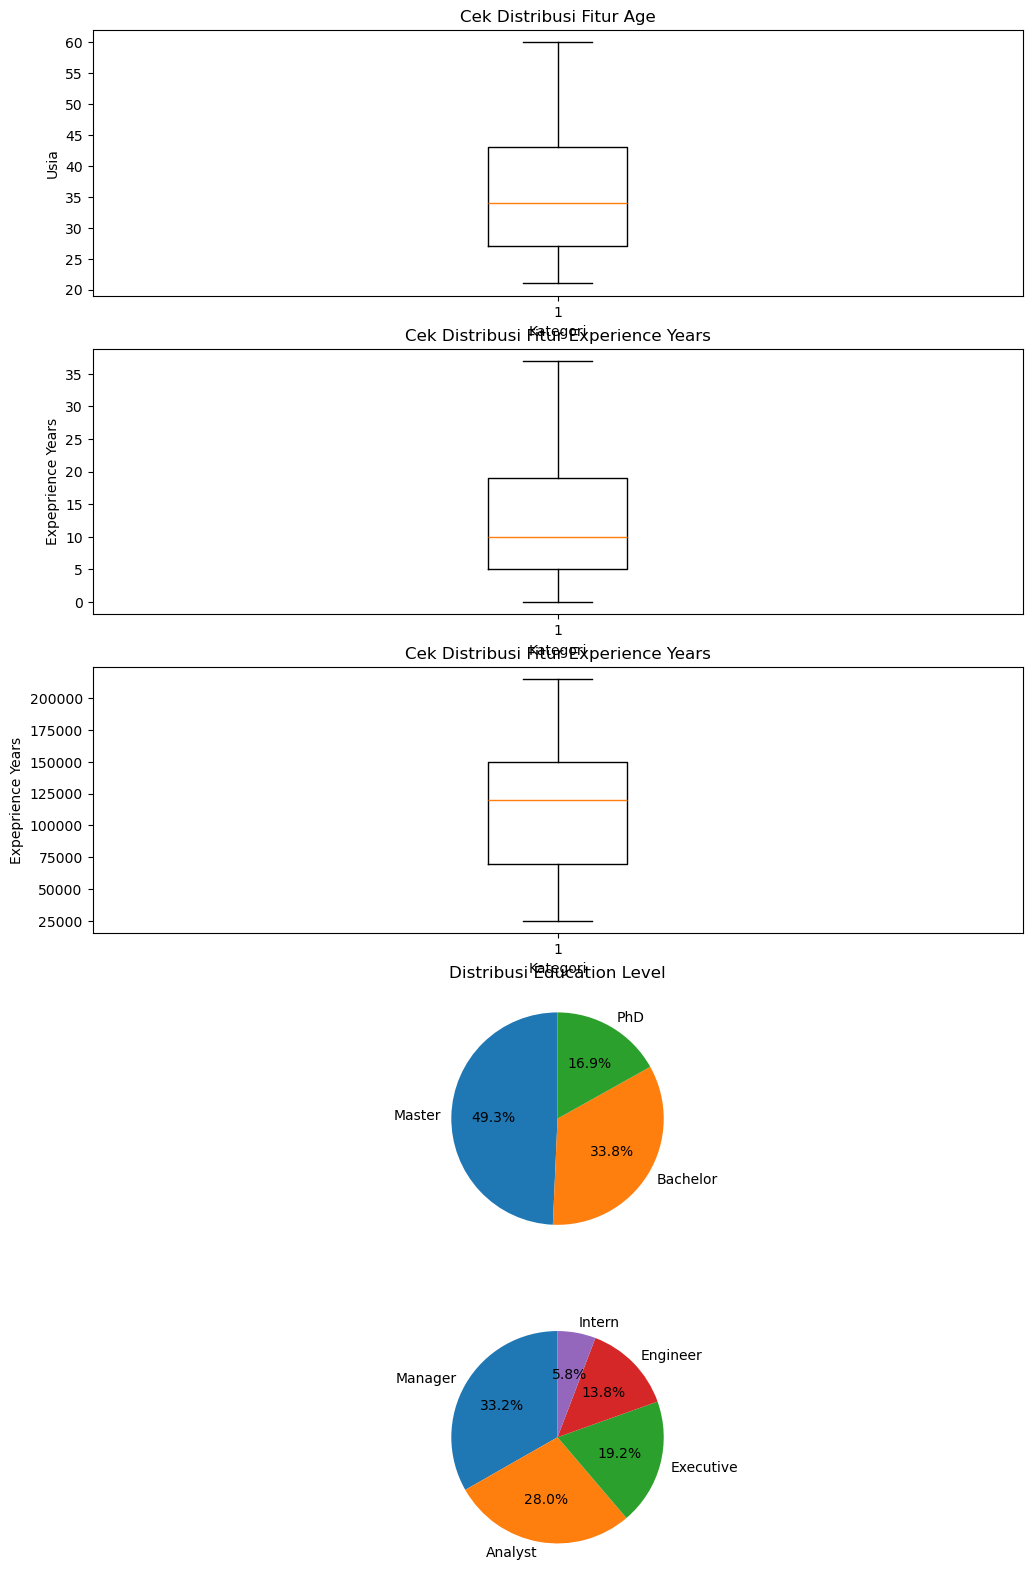

In [10]:
fig, axs = plt.subplots(5, 1, figsize=(12, 20))

axs[0].boxplot(df["Age"])
axs[0].set_title("Cek Distribusi Fitur Age")
axs[0].set_xlabel("Kategori")
axs[0].set_ylabel("Usia")

axs[1].boxplot(df["Experience_Years"])
axs[1].set_title("Cek Distribusi Fitur Experience Years")
axs[1].set_xlabel("Kategori")
axs[1].set_ylabel("Expeprience Years")

axs[2].boxplot(df["Salary"])
axs[2].set_title("Cek Distribusi Fitur Experience Years")
axs[2].set_xlabel("Kategori")
axs[2].set_ylabel("Expeprience Years")

axs[3].pie(
    df["Education_Level"].value_counts(),
    labels=df["Education_Level"].value_counts().index,
    autopct='%1.1f%%',
    startangle=90
)
axs[3].set_title("Distribusi Education Level")

axs[4].pie(
    df["Job_Title"].value_counts(),
    labels=df["Job_Title"].value_counts().index,
    autopct='%1.1f%%',
    startangle=90
)
axs[3].set_title("Distribusi Education Level")

### 2.1 Deskripsi singkat encode
- `Gender` -> Female: 0 dan Male: 1
- `Education_Level` -> Bachelor: 0, Master: 1, PhD: 3

In [11]:
df["Gender"] = df["Gender"].map({"Female": 0, "Male": 1})
df["Education_Level"] = df["Education_Level"].map({"Bachelor": 0, "Master": 1, "PhD": 3})
df = df.drop("Employee_ID", axis=1)

In [12]:
df.sample(10)

,Age,Gender,Department,Job_Title,Experience_Years,Education_Level,Location,Salary
3584,38,1,Finance,Manager,15,1,New York,135000
6613,40,1,Marketing,Manager,17,1,New York,145000
7298,39,0,Product,Manager,16,1,San Francisco,125000
8385,39,0,Engineering,Engineer,16,1,Chicago,115000
6854,32,0,Product,Engineer,11,0,Austin,95000
2224,36,0,HR,Manager,13,1,Austin,130000
9764,33,1,Product,Engineer,12,0,New York,105000
9851,31,1,Engineering,Manager,8,1,New York,115000
642,25,0,Engineering,Intern,1,0,Seattle,30000
9554,24,1,Sales,Analyst,3,0,Chicago,65000


## 3. Melakukan agregasi

In [13]:
# Rata rata gaji per jabatan
df.groupby("Job_Title")["Salary"].agg("mean").round(0)

Job_Title
Analyst       69478.0
Engineer      99273.0
Executive    183415.0
Intern        35802.0
Manager      135260.0
Name: Salary, dtype: float64

In [14]:
# Rata rata gaji per lokasi dan jabatan
df.groupby(["Location", "Job_Title"])["Salary"].agg("mean").round(0).unstack()

Job_Title,Analyst,Engineer,Executive,Intern,Manager
Location,,,,,
Austin,69700.0,99399.0,184297.0,36799.0,134969.0
Chicago,69036.0,99861.0,182066.0,35570.0,135776.0
New York,69447.0,100146.0,184105.0,35654.0,134985.0
San Francisco,69872.0,98042.0,183355.0,35378.0,135333.0
Seattle,69377.0,98963.0,183225.0,35347.0,135236.0


In [15]:
# Rata rata pengalaman kerja per jabatan
df.groupby("Job_Title")["Experience_Years"].agg("mean").round(0)

Job_Title
Analyst       5.0
Engineer      9.0
Executive    23.0
Intern        1.0
Manager      16.0
Name: Experience_Years, dtype: float64

In [16]:
# Rata rata gaji per department
df.groupby("Department")["Salary"].agg("mean").round(0)

Department
Engineering     90680.0
Finance        130376.0
HR             126401.0
Marketing      101735.0
Product        116676.0
Sales          127310.0
Name: Salary, dtype: float64

In [17]:
# Rata rata gaji per pendidikan
df.groupby("Education_Level")["Salary"].agg("mean")

Education_Level
0     69529.724933
1    134234.279919
3    152137.359384
Name: Salary, dtype: float64

## 4. Split dataset dan pemodelan

In [18]:
df.head()

,Age,Gender,Department,Job_Title,Experience_Years,Education_Level,Location,Salary
0,24,0,Engineering,Engineer,1,1,Austin,90000
1,56,1,Sales,Executive,33,1,Seattle,195000
2,21,1,Engineering,Intern,1,0,New York,35000
3,30,1,Finance,Analyst,9,0,New York,75000
4,25,0,HR,Analyst,2,1,Seattle,70000


In [19]:
category_features = ["Department", "Job_Title", "Location"]
category_transform = Pipeline(steps=[
    ("ohe", OneHotEncoder(handle_unknown="ignore"))
])

numerical_features = ["Age", "Experience_Years", "Education_Level"]

binary_feature = ["Gender"]

preprocessing = ColumnTransformer(transformers=[
    ("cat", category_transform, category_features),
    ("num", "passthrough",numerical_features),
    ("bin", "passthrough",binary_feature)
])

model = Pipeline(steps=[
    ("preprocessing", preprocessing),
    ("model", RandomForestRegressor())
])

X = df.drop("Salary", axis=1)
y = df["Salary"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Department', 'Job_Title',
                                                   'Location']),
                                                 ('num', 'passthrough',
                                                  ['Age', 'Experience_Years',
                                                   'Education_Level']),
                                                 ('bin', 'passthrough',
                                                  ['Gender'])])),
                ('model', RandomForestRegressor())])

### 4.1 Base Line Evaluasi Matrik 

In [20]:
model.score(X_test, y_test)

0.9886361425864305

In [21]:
y_pred = model.predict(X_test)
cross_val = cross_val_score(model, X= X_train, y= y_train, cv=5, scoring="r2")
cross_val

array([0.98938188, 0.98867172, 0.98836334, 0.98843166, 0.98845764])

In [22]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"R2: {round(r2, 2)}\nMAE: {round(mae, 2)}\nMSE: {round(mse, 2)}")

R2: 0.99
MAE: 3892.91
MSE: 23951170.37


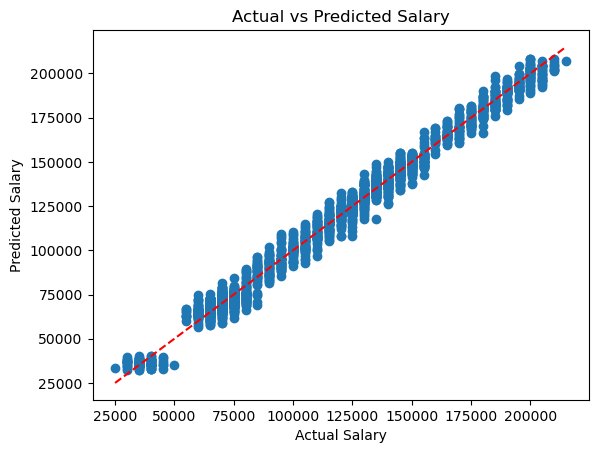

In [23]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

In [24]:
df["Salary"].describe()

count     10000.000000
mean     115381.500000
std       46066.139047
min       25000.000000
25%       70000.000000
50%      120000.000000
75%      150000.000000
max      215000.000000
Name: Salary, dtype: float64

In [25]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Train R²:", r2_train)
print("Test R² :", r2_test)

Train R²: 0.9949650323077459
Test R² : 0.9886361425864305


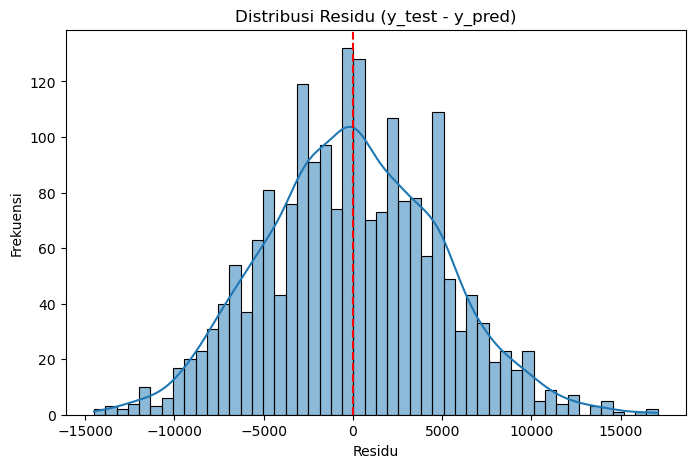

In [26]:
residuals = y_test - y_test_pred

plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=50, kde=True)
plt.title("Distribusi Residu (y_test - y_pred)")
plt.xlabel("Residu")
plt.ylabel("Frekuensi")
plt.axvline(0, color='red', linestyle='--')
plt.show()


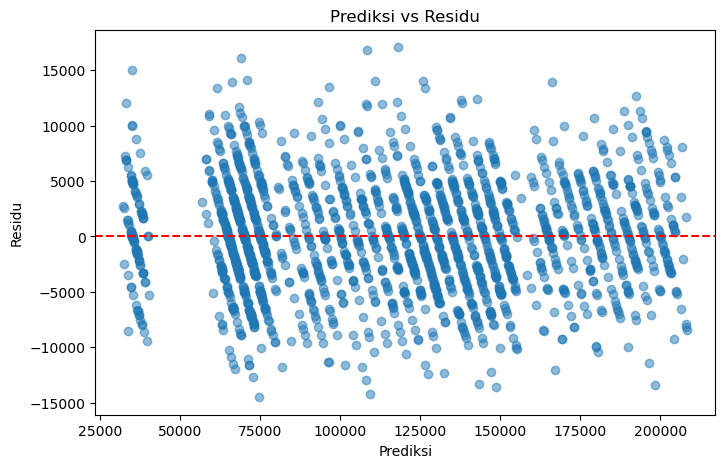

In [27]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test_pred, residuals, alpha=0.5)
plt.title("Prediksi vs Residu")
plt.xlabel("Prediksi")
plt.ylabel("Residu")
plt.axhline(0, color='red', linestyle='--')
plt.show()


### 4.2 Hyperparameter Tunning Model

In [28]:
pipe_grid = {
    "model__n_estimators": [100, 1000],
    "model__max_depth": [None, 10, 20, 30],
    "model__min_samples_split": [2, 4, 6],
    "model__min_samples_leaf": [2, 4],
    "model__max_features": [1.0, "sqrt"]
}

gs_model = GridSearchCV(estimator=model, param_grid=pipe_grid, cv=5, n_jobs=-1, verbose=2)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Department',
                                                                          'Job_Title',
                                                                          'Location']),
                                                                        ('num',
                                                                         'passthrough',
                                                                         ['Age',
                                                                          'Experience_Years',
                                                                          'Education_Level']),
                                                                        ('bin',
                                                                         'passthrough',
                                                                         ['Gender'])])),
                                       ('model', RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'model__max_depth': [None, 10, 20, 30],
                         'model__max_features': [1.0, 'sqrt'],
                         'model__min_samples_leaf': [2, 4],
                         'model__min_samples_split': [2, 4, 6],
                         'model__n_estimators': [100, 1000]},
             verbose=2)

#### 4.2.1 Model Tunning Evaluasi Metrik

In [29]:
gs_model.score(X_train, y_train)

0.9929816366371053

In [30]:
best_model = gs_model.best_estimator_
y_pred2 = best_model.predict(X_test)
cross_val = cross_val_score(best_model, X= X_train, y= y_train, cv=5, scoring="r2")
cross_val

array([0.99106718, 0.99086687, 0.99088972, 0.99055384, 0.99037393])

In [31]:
r2 = r2_score(y_test, y_pred2)
mae = mean_absolute_error(y_test, y_pred2)
mse = mean_squared_error(y_test, y_pred2)
print(f"R2: {round(r2, 2)}\nMAE: {round(mae, 2)}\nMSE: {round(mse, 2)}")

R2: 0.99
MAE: 3482.82
MSE: 18985368.96


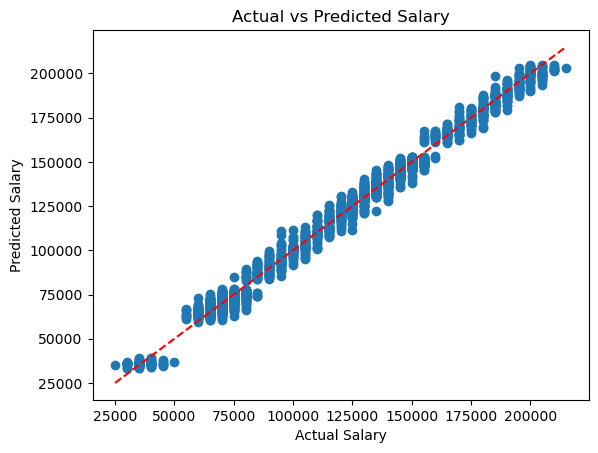

In [32]:
plt.scatter(y_test, y_pred2)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

In [33]:
y_train_pred2 = best_model.predict(X_train)
y_test_pred2 = best_model.predict(X_test)

r2_train = r2_score(y_train, y_train_pred2)
r2_test = r2_score(y_test, y_test_pred2)

print("Train R²:", r2_train)
print("Test R² :", r2_test)

Train R²: 0.9929816366371053
Test R² : 0.9909922136386519


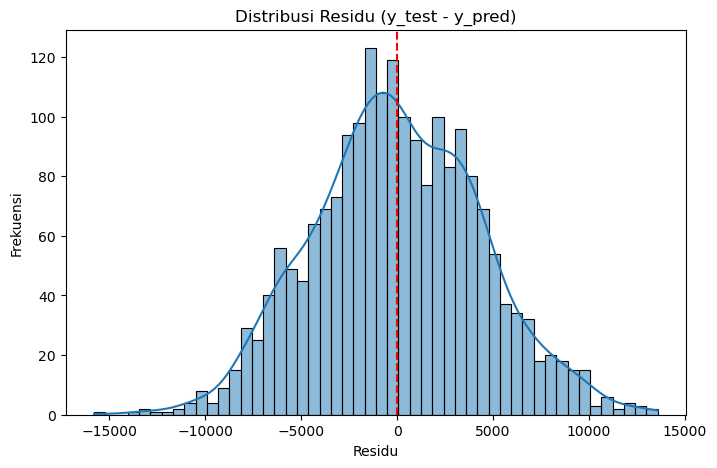

In [34]:
residuals = y_test - y_test_pred2

plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=50, kde=True)
plt.title("Distribusi Residu (y_test - y_pred)")
plt.xlabel("Residu")
plt.ylabel("Frekuensi")
plt.axvline(0, color='red', linestyle='--')
plt.show()


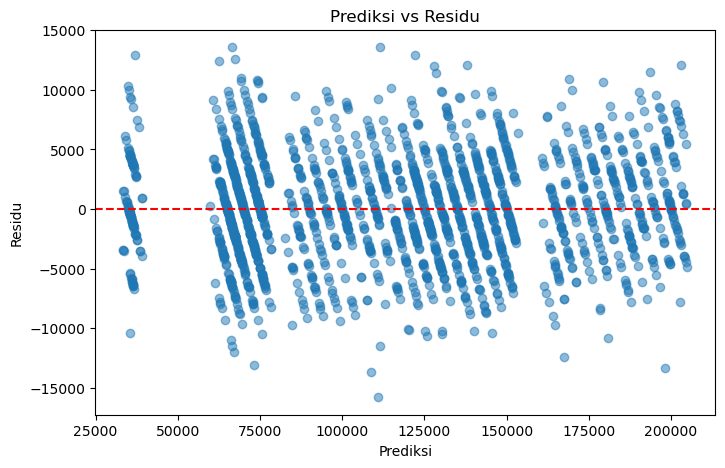

In [35]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test_pred2, residuals, alpha=0.5)
plt.title("Prediksi vs Residu")
plt.xlabel("Prediksi")
plt.ylabel("Residu")
plt.axhline(0, color='red', linestyle='--')
plt.show()

## 5. Menerapkan kepada data baru untuk BaseLine Model maupun Tunning Model

In [36]:
new_employee = pd.DataFrame({
    "Age": [53],
    "Gender": ["Male"],
    "Department": ["Marketing"],
    "Job_Title": ["Manager"],
    "Experience_Years": [29],
    "Education_Level": ["Bachelor"],
    "Location": ["Chicago"]
})

# --- 3. LAKUKAN PREDIKSI ---

# Melakukan encoding manual pada data baru
new_employee["Gender"] = new_employee["Gender"].map({"Female": 0, "Male": 1})
new_employee["Education_Level"] = new_employee["Education_Level"].map({"Bachelor": 0, "Master": 1, "PhD": 3})

# Memprediksi gaji
predicted_salary = model.predict(new_employee)
predicted_salary2 = best_model.predict(new_employee)

# Menampilkan hasil
print(f"Prediksi Gaji Tahunan: ${predicted_salary[0]:,.2f} USD")
print(f"Prediksi Gaji Tahunan: ${predicted_salary2[0]:,.2f} USD")

Prediksi Gaji Tahunan: $152,169.67 USD
Prediksi Gaji Tahunan: $143,853.02 USD


## Kesimpulan

- Metrics Eval Sebelum tunning:
  - R2: 0.99
  - MAE: 3904.86
  - MSE: 24050136.67
- Metrics Eval Sesudah tunning:
  - R2: 0.99
  - MAE: 3486.55
  - MSE: 19029942.44

Terdapat penurunan dibagian `MAE` dan `MSE` pada model yang sudah ditunning. Kalian bisa langsung menggunakan model ini atau melakukan beberapa `Evaluasi` lagi untuk memastikan bahwa model benar benar bagus atau mengalama kendala (Seperti `overfit`/`underfit`, dll).

Jika ada perbaikan/saran untuk membuat model jauh lebih baik, silahkan beritahu...

# Improve Model`

In [37]:
df2 = pd.read_csv("../../data/Employers_data.csv")
df2.shape

(10000, 10)

In [38]:
df2.sample(10)

,Employee_ID,Name,Age,Gender,Department,Job_Title,Experience_Years,Education_Level,Location,Salary
3869,3870,Shawn Miller,42,Male,HR,Manager,15,PhD,Seattle,140000
1009,1010,Alice Olague,46,Female,HR,Manager,23,Master,Austin,150000
6513,6514,Angelo Hartz,44,Male,Finance,Executive,17,PhD,New York,175000
9051,9052,Chris Berry,28,Male,HR,Analyst,5,Master,Austin,75000
3968,3969,Tina Rhee,23,Female,Engineering,Intern,0,Bachelor,Seattle,30000
5935,5936,Virginia Reyes,60,Female,Finance,Executive,37,Master,San Francisco,200000
5901,5902,Joan Witter,30,Female,Engineering,Engineer,9,Bachelor,Chicago,95000
6585,6586,James Kuykendall,37,Male,HR,Executive,10,PhD,New York,165000
5065,5066,Lawrence Campbell,48,Male,Marketing,Manager,21,PhD,New York,145000
8318,8319,Debi Weissgerber,38,Female,Sales,Executive,11,PhD,New York,165000


In [39]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Employee_ID       10000 non-null  int64 
 1   Name              10000 non-null  object
 2   Age               10000 non-null  int64 
 3   Gender            10000 non-null  object
 4   Department        10000 non-null  object
 5   Job_Title         10000 non-null  object
 6   Experience_Years  10000 non-null  int64 
 7   Education_Level   10000 non-null  object
 8   Location          10000 non-null  object
 9   Salary            10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [40]:
df2.describe()

,Employee_ID,Age,Experience_Years,Salary
count,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,35.455900,12.370900,115381.500000
std,2886.89568,10.000213,9.148951,46066.139047
min,1.00000,21.000000,0.000000,25000.000000
25%,2500.75000,27.000000,5.000000,70000.000000
50%,5000.50000,34.000000,10.000000,120000.000000
75%,7500.25000,43.000000,19.000000,150000.000000
max,10000.00000,60.000000,37.000000,215000.000000


In [41]:
df2_cleaned = df2.drop(["Employee_ID", "Name"], axis=1)
df2_cleaned

,Age,Gender,Department,Job_Title,Experience_Years,Education_Level,Location,Salary
0,24,Female,Engineering,Engineer,1,Master,Austin,90000
1,56,Male,Sales,Executive,33,Master,Seattle,195000
2,21,Male,Engineering,Intern,1,Bachelor,New York,35000
3,30,Male,Finance,Analyst,9,Bachelor,New York,75000
4,25,Female,HR,Analyst,2,Master,Seattle,70000
...,...,...,...,...,...,...,...,...
9995,51,Male,Sales,Executive,28,Master,Austin,185000
9996,36,Female,Sales,Executive,9,PhD,San Francisco,165000
9997,57,Male,Sales,Executive,30,PhD,New York,200000
9998,37,Female,Engineering,Manager,14,Master,New York,135000


## Data Cleaning

In [42]:
df2_cleaned.isna().sum() /len(df2_cleaned) * 100

Age                 0.0
Gender              0.0
Department          0.0
Job_Title           0.0
Experience_Years    0.0
Education_Level     0.0
Location            0.0
Salary              0.0
dtype: float64

In [43]:
df2_cleaned.duplicated().sum()

np.int64(3157)

In [44]:
df2_cleaned = df2_cleaned.drop_duplicates()
df2_cleaned.duplicated().sum()

np.int64(0)

In [45]:
df2_cleaned.shape

(6843, 8)

## Visualisasi Data

Text(0.5, 1.0, 'Korelasi Antar Fitur Numerik')

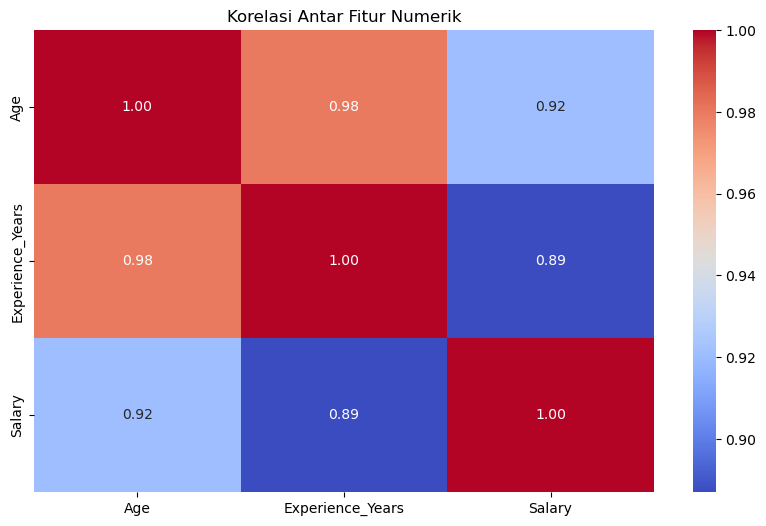

In [46]:
plt.figure(figsize=(10, 6))
sns.heatmap(df2_cleaned.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi Antar Fitur Numerik')

Text(0, 0.5, 'Jabatan')

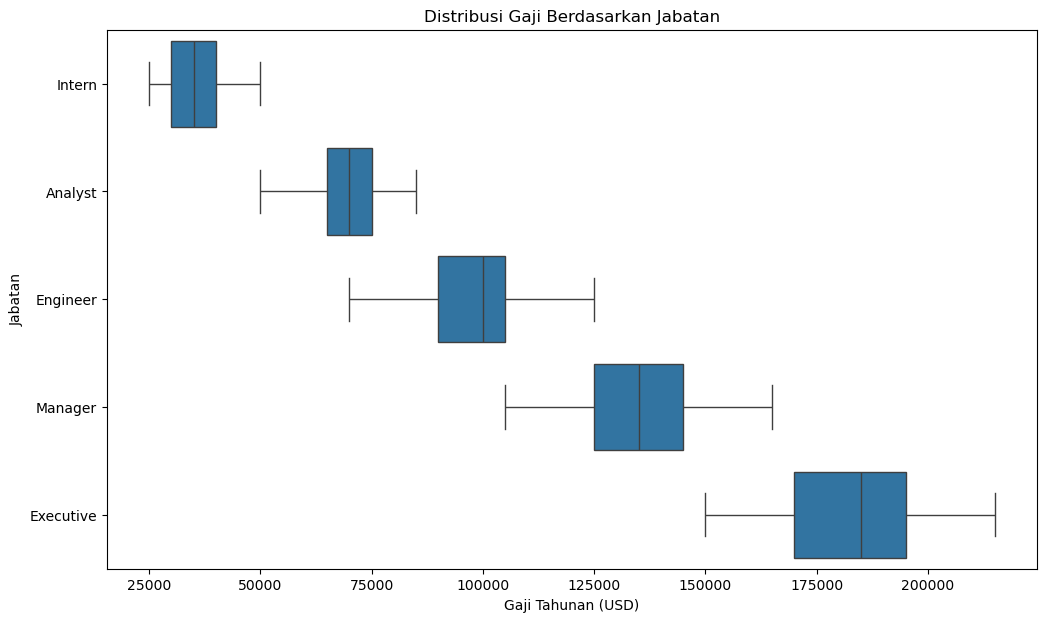

In [47]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Salary', y='Job_Title', data=df2_cleaned, order=df2_cleaned.groupby('Job_Title')['Salary'].median().sort_values().index)
plt.title('Distribusi Gaji Berdasarkan Jabatan')
plt.xlabel('Gaji Tahunan (USD)')
plt.ylabel('Jabatan')

Text(0, 0.5, 'Tingkat Pendidikan')

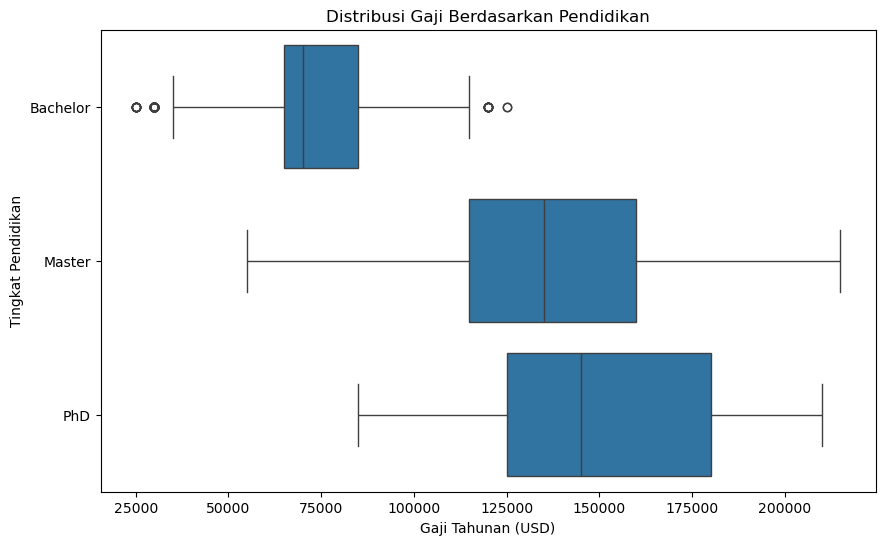

In [48]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Salary', y='Education_Level', data=df2_cleaned, order=['Bachelor', 'Master', 'PhD'])
plt.title('Distribusi Gaji Berdasarkan Pendidikan')
plt.xlabel('Gaji Tahunan (USD)')
plt.ylabel('Tingkat Pendidikan')

## Preprocessing

In [49]:
X = df2_cleaned.drop("Salary", axis=1)
y = df2_cleaned["Salary"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Category2_features = ["Department", "Job_Title", "Location", "Gender"]
category2_transformer = Pipeline(steps=[
    ("ohe", OneHotEncoder(handle_unknown="ignore"))
])

ordinal_feature = ["Education_Level"]
education_order = ["Bachelor", "Master", "PhD"]
ordinal_transformer = Pipeline(steps=[
    ("oe", OrdinalEncoder(categories=[education_order]))
])

numeric_features = ["Age", "Experience_Years"]

preprocessing2 = ColumnTransformer(transformers=[
    ("num", "passthrough", numeric_features),
    ("ordinal", ordinal_transformer, ordinal_feature),
    ("cat", category2_transformer, Category2_features)
], remainder="passthrough")

model2 = Pipeline(steps=[
    ("Preprocessing2", preprocessing2),
    ("model2", RandomForestRegressor(random_state=42))
])

model2.fit(X_train, y_train)
model2.score(X_test, y_test)

0.9840961917382088

In [50]:
param_grid2 = {
    'model2__n_estimators': [100, 200],
    'model2__max_depth': [10, 20, None],
    'model2__min_samples_split': [2, 5],
    'model2__min_samples_leaf': [2, 4],
    'model2__max_features': [1.0, 'sqrt']
}

grid_search2 = GridSearchCV(model2, param_grid2, cv=5, n_jobs=-1, verbose=2)

grid_search2.fit(X_train, y_train)

best_model2 = grid_search2.best_estimator_
best_model2

Fitting 5 folds for each of 48 candidates, totalling 240 fits


Pipeline(steps=[('Preprocessing2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', 'passthrough',
                                                  ['Age', 'Experience_Years']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('oe',
                                                                   OrdinalEncoder(categories=[['Bachelor',
                                                                                               'Master',
                                                                                               'PhD']]))]),
                                                  ['Education_Level']),
                                                 ('cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Department', 'Job_Title',
                                                   'Location', 'Gender'])])),
                ('model2',
                 RandomForestRegressor(max_depth=20, max_features='sqrt',
                                       min_samples_leaf=4, n_estimators=200,
                                       random_state=42))])

In [51]:
best_model2.score(X_test, y_test)

0.9884061744944981

In [52]:
y_pred_new = best_model2.predict(X_test)
cross_val = cross_val_score(best_model2, X= X_train, y= y_train, cv=5, scoring="r2")
cross_val

array([0.98812703, 0.98829894, 0.98760715, 0.98654804, 0.98779069])

In [53]:
r2 = r2_score(y_test, y_pred_new)
mae = mean_absolute_error(y_test, y_pred_new)
mse = mean_squared_error(y_test, y_pred_new)
print(f"R2: {round(r2, 2)}\nMAE: {round(mae, 2)}\nMSE: {round(mse, 2)}")

R2: 0.99
MAE: 3927.85
MSE: 22769378.44


In [54]:
y_train_pred_new = best_model2.predict(X_train)
y_test_pred_new = best_model2.predict(X_test)

r2_train = r2_score(y_train, y_train_pred_new)
r2_test = r2_score(y_test, y_test_pred_new)

print("Train R²:", r2_train)
print("Test R² :", r2_test)

Train R²: 0.990758557777201
Test R² : 0.9884061744944981


In [55]:
import joblib

# Asumsi model hasil tunning-mu disimpan dalam variabel 'gs_model'
# dan model hasil modifikasi saran saya ada di 'grid_search'

# 1. Mengekspor model terbaik dari hasil tunning-mu
joblib.dump(best_model, 'model_setelah_tunninng_v1.pkl')
print("Model hasil tunning-mu berhasil diekspor ke 'model_anda_tuned.pkl'")

# 2. Mengekspor model terbaik dari saran saya (dengan pipeline yang dioptimalkan)
# Jika kamu sudah menjalankan kode yang saya sarankan, variabelnya adalah grid_search
joblib.dump(best_model2, 'model_improve_terbaru_v2.pkl')
print("Model hasil saran saya berhasil diekspor ke 'model_saran_gemini.pkl'")

Model hasil tunning-mu berhasil diekspor ke 'model_anda_tuned.pkl'
Model hasil saran saya berhasil diekspor ke 'model_saran_gemini.pkl'
